In [10]:
data = '../dataset/highway.mp4'
weights = '../weights/yolo11n.pt'


In [11]:
# from supervision.assets import download_assets, VideoAssets
# data = download_assets(VideoAssets.VEHICLES)

In [12]:
from ultralytics import YOLO

model = YOLO(weights)
# check if values are unique
assert len(set(model.names.values())) == len(model.names.values())

# get class id from class name
target_class = 'truck'
target_class_id = {v: k for k, v in model.names.items()}[target_class]



In [13]:
results = model.predict(source=data, conf=0.3, stream=True)

track_detection_result = {}

for frame_id, r in enumerate(results):
    target_class_idx = r.boxes.cls == target_class_id
    if target_class_id not in r.boxes.cls:
        continue

    xyxy = r.boxes.xyxy[target_class_idx]
    track_detection_result[frame_id] = xyxy



video 1/1 (frame 1/538) /Users/hagayuya/Desktop/TUT_Lectures/robotics-assignment2-bayesian-filtering/notebooks/../dataset/highway.mp4: 384x640 3 cars, 23.6ms
video 1/1 (frame 2/538) /Users/hagayuya/Desktop/TUT_Lectures/robotics-assignment2-bayesian-filtering/notebooks/../dataset/highway.mp4: 384x640 3 cars, 20.9ms
video 1/1 (frame 3/538) /Users/hagayuya/Desktop/TUT_Lectures/robotics-assignment2-bayesian-filtering/notebooks/../dataset/highway.mp4: 384x640 3 cars, 20.4ms
video 1/1 (frame 4/538) /Users/hagayuya/Desktop/TUT_Lectures/robotics-assignment2-bayesian-filtering/notebooks/../dataset/highway.mp4: 384x640 3 cars, 18.7ms
video 1/1 (frame 5/538) /Users/hagayuya/Desktop/TUT_Lectures/robotics-assignment2-bayesian-filtering/notebooks/../dataset/highway.mp4: 384x640 3 cars, 21.6ms
video 1/1 (frame 6/538) /Users/hagayuya/Desktop/TUT_Lectures/robotics-assignment2-bayesian-filtering/notebooks/../dataset/highway.mp4: 384x640 3 cars, 20.4ms
video 1/1 (frame 7/538) /Users/hagayuya/Desktop/TUT

In [14]:
r.orig_img.shape

(2160, 3840, 3)

In [45]:
track_detection_result[166][::, [0,1]]
track_detection_result

{166: tensor([[  2.1080,  10.3934, 618.9799, 425.8980]]),
 169: tensor([[  2.6297,   7.7106, 626.4327, 425.6266]]),
 170: tensor([[  2.8086,   6.5089, 648.2119, 426.0409]]),
 311: tensor([[3.3492e-01, 3.2880e+02, 1.1557e+02, 4.2554e+02]]),
 353: tensor([[ 56.0956, 279.2268, 179.2763, 366.4767]]),
 354: tensor([[ 12.5993, 286.7968, 149.8600, 396.1306]]),
 391: tensor([[188.2722,  68.8053, 344.4500, 183.4145]]),
 392: tensor([[184.8522,  69.3049, 344.9380, 183.7254]]),
 393: tensor([[185.0147,  69.9256, 345.0414, 186.4921]]),
 394: tensor([[158.8906,  69.8720, 343.8554, 185.5954]]),
 395: tensor([[161.3774,  67.4240, 341.5668, 182.2259]]),
 396: tensor([[153.3031,  64.7857, 340.7975, 179.6281]]),
 397: tensor([[150.7028,  62.8460, 339.8588, 180.0265]]),
 398: tensor([[146.6884,  62.1410, 338.9657, 180.8971],
         [  1.8861,  10.3814, 575.8669, 423.9327]]),
 399: tensor([[145.8105,  62.4146, 338.3808, 180.4043]]),
 400: tensor([[142.8529,  63.9640, 339.4430, 183.8570]]),
 401: tensor(

In [12]:
xyxy


tensor([[  2.1945,  71.3127, 235.3531, 211.2033]])

In [7]:
tmp = {}
for k,v in track_detection_result.items():
    tmp[k] = v.cpu().tolist()

In [33]:
import numpy as np

time = tmp.keys()

x1 = [ xyxy[0][0] for xyxy in tmp.values()]
x2 = [ xyxy[0][1] for xyxy in tmp.values()]
y1 = [ xyxy[0][2] for xyxy in tmp.values()]
y2 = [ xyxy[0][3] for xyxy in tmp.values()]

x = np.abs((np.array(x1) - np.array(x2))).tolist()
y = np.abs((np.array(y1) - np.array(y2))).tolist()

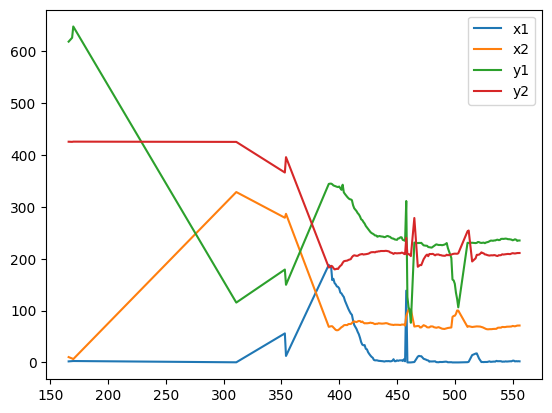

In [35]:
import matplotlib.pyplot as plt

plt.plot(time, x1, label="x1")
plt.plot(time, x2, label="x2")
plt.plot(time, y1, label="y1")
plt.plot(time, y2, label="y2")

plt.legend()

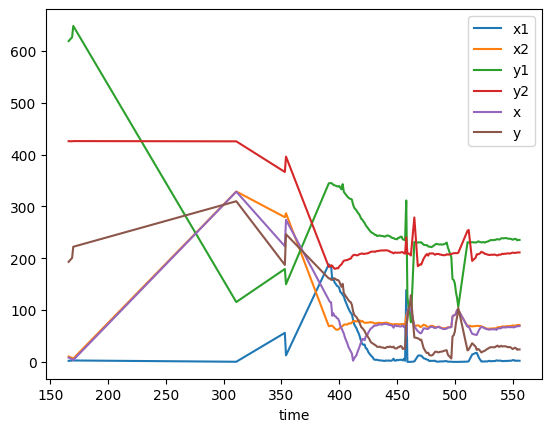

In [37]:
import pandas as pd

track_position_df = pd.DataFrame()
track_position_df["time"] = time
track_position_df["x1"] = x1
track_position_df["x2"] = x2
track_position_df["y1"] = y1
track_position_df["y2"] = y2
track_position_df["x"] = x
track_position_df["y"] = y

track_position_df.plot(x="time")
track_position_df.to_csv("../results/track_position.csv")

In [9]:
result_idx = -10
result = results[result_idx]

target_class_idx = results[result_idx].boxes.cls == target_class_id



TypeError: 'generator' object is not subscriptable